# Machine Learning
### DePaul University
Ilyas Ustun


# What is classification?

###  Which of the following is a classification problem?
Developing a good intuition of classification problems is important. Of the scenarios listed below select the ones that you think are classification problems and justify your choice.

 1. Using labeled historic pricing data to predict if the price of gold will increase or decrease tomorrow. This is classification
 2. Using labeled pricing data to predict the price of gold tomorrow. This is regression.
 3. Using unlabeled data to cluster job candidates into roles. Not classification. 
 4. Using labeled data to predict the number of sales of a new song. This is Regression because of sales
 5. Training a drone to recognize a certain type of terrain from labeled data. This is Classification
 6. Using labeled flower data, predict the type of a new flower. This is classification


# Classification of IRIS dataset using Scikit-Learn 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, metrics
%matplotlib inline 

### IRIS data set
#### https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg", width=200, height=200)

In [3]:
# import Iris dataset from Scikit-Learn's datasets
iris = datasets.load_iris()

print ("Shape of the data ", iris.data.shape) # shape of the data
print ("Shape of the data ", iris.target_names)
print ("Attributes ", iris.feature_names)

#view first 5 rows
print (iris.data[range(5)])
print (iris.target[range(5)])

Shape of the data  (150, 4)
Shape of the data  ['setosa' 'versicolor' 'virginica']
Attributes  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#show it as a table
df = pd.DataFrame(data=iris.data) # converting the input data into a dataframe
df.columns = iris.feature_names   # assigning column names
df['Class'] = iris.target         # adding a new column to the data frame.
df['Name'] = iris.target_names[iris.target] # adding a new column to the data frame
df.head() # first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df.tail() # the first five rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    int32  
 5   Name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


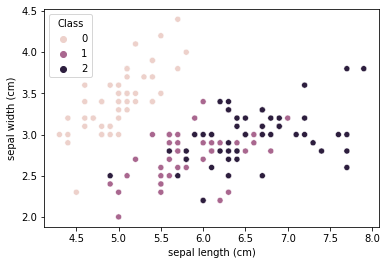

In [8]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Class');

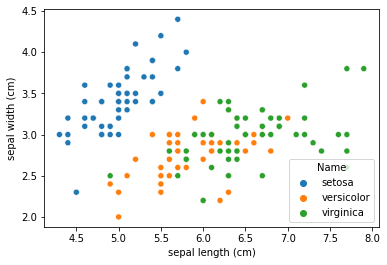

In [9]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Name');

<p>So using a distinct categorical vaariable produces a better pallet</p>

Get the X and y arrays:

In [10]:
X = iris.data[:, :2]  # we only take the first two features all rows
y = iris.target

In [11]:
X[:6, :] # check the first 6 rows of the columns in our data set

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9]])

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Using the dataframe this can be done by using the .iloc() or .loc() methods. However the datasets returned will be a dataframe for X, and pandas series for y.

In [13]:
# give me back all the rows but only these two columns
X = df.loc[:, ['sepal length (cm)', 'sepal width (cm)']]  # we only take the first two features.
y = df.Class

In [14]:
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [15]:
y # this is a pandas series, which is a one dimension

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int32

**`sklearn` accepts both arrays and dataframes, so both methods are  OK.**

### Create train-test split

In [16]:
from sklearn.model_selection import train_test_split
# test_size of 0.33 defines that I want 30% to go into my testing
# random_state with a number defines that you have the same result.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 96 to 102
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [18]:
y_train.shape

(100,)

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 73 to 109
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  50 non-null     float64
 1   sepal width (cm)   50 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


In [20]:
y_test.shape

(50,)

### Generate Model

In [21]:
# Logistic Regression
# instantiation
logreg = linear_model.LogisticRegression(C=1e5)

# fit the classifier on the data
# model fitting
logreg.fit(X_train, y_train)

# output the classifiers prediction on training set
pred_train = logreg.predict(X_train)

# output the classifiers prediction on testing set
pred_test = logreg.predict(X_test)

In [22]:
pred_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2])

In [23]:
# accuracy
# comparing the actual values, y train with the predicted values
(y_train == pred_train).mean()

0.82

In [24]:
(y_test == pred_test).mean()

0.8

<p>In general for larger normal datasets, the training accuracy should be higher and the testing accuracy should be lower.</p>

In [25]:
# misclassification rate on the training
(y_train != pred_train).mean()

0.18

In [26]:
# misclassification rate on the testing data set
(y_test != pred_test).mean()

0.2

### Predict

In [27]:
X_test['Predicted'] = pred_test
X_test['Actual'] = y_test
# df['Predicted Name'] = iris.target_names[predicted]
#df.head()
X_test.tail() #end of the data

,sepal length (cm),sepal width (cm),Predicted,Actual
81,5.5,2.4,1,1
133,6.3,2.8,2,2
137,6.4,3.1,2,2
75,6.6,3.0,2,1
109,7.2,3.6,2,2


<p>Here, we tire everything back to the testing dataset.</p>

### Plot decision boundaries

In [28]:
df.groupby("Name").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
Name,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [29]:
legend_labels = ["setosa", "versicolor", "virginica"]

In [30]:
X_test.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'Predicted', 'Actual'], dtype='object')

In [31]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

def plot_clf_boundary(X, y, legend_labels):
    
    xlabel = X.columns.tolist()[0]
    ylabel = X.columns.tolist()[1]
    
    X = X.values.copy()
    
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, )

    fig_kw = {"figsize":(7, 5)}
    fig, ax = plt.subplots(**fig_kw)

    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.rainbow, shading='auto')

    # Plot also the training points
    kwargs = {'edgecolor':"k",
                 # 'facecolor':"k",
                 'linewidth':1,
                 'linestyle':'--',
                }

    # sns.scatterplot(data=X_test, x="sepal length (cm)", y="sepal width (cm)", hue=y_test, palette=plt.cm.rainbow, **kwargs)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.rainbow)
    plt.xlabel(xlabel, fontdict = {'size': 16})
    plt.ylabel(ylabel, fontdict = {'size': 16})


    # produce a legend with the unique colors from the scatter
    # get the handles and labels
    handles, _ = scatter.legend_elements()
    legend1 = ax.legend(# *scatter.legend_elements(),
                        handles, legend_labels,
                        loc="lower left", title="Classes")
    ax.add_artist(legend1)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

C:\Users\REJALU\.conda\envs\renv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 432x288 with 0 Axes>

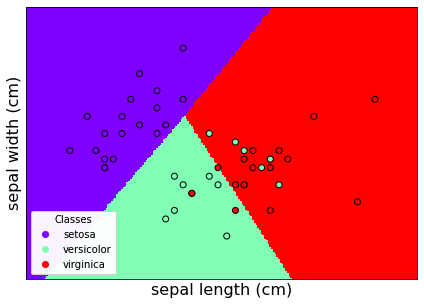

In [32]:
plot_clf_boundary(X=X_test, y=y_test, legend_labels=legend_labels)

<p>This means that there are three classes: setosa, versicolor, virginica in purple, greenish and red respectively. This means that if a point ended up in purple color, it will be predicted as setosa, if it ended up in the grenish area, it will be predicted as versicolor and so on. Everything in purple agrees with each other. In the greenish area, we have some red points and this is means that there is a mis-classification; the same that applies to the greenish points in the red area, there are on the wrong side of the boundary.</p>

### Plot confusion matrix

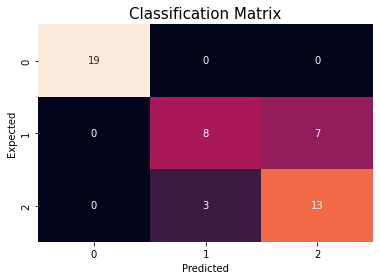

In [33]:
confusion_matrix =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Classification Matrix", fontsize = 15)
plt.show() # this is one way to create one

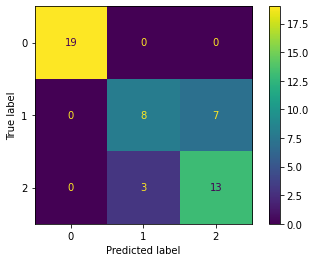

In [34]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=pred_test)

<p>The same plot is plotted as above though it looks better.Class 0 and 2 are predcited correctly.</p>

In [35]:
metrics.confusion_matrix(y_true=y_test, y_pred=pred_test)

array([[19,  0,  0],
       [ 0,  8,  7],
       [ 0,  3, 13]], dtype=int64)

### Classification Report

In [36]:
print (metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.73      0.53      0.62        15
           2       0.65      0.81      0.72        16

    accuracy                           0.80        50
   macro avg       0.79      0.78      0.78        50
weighted avg       0.81      0.80      0.80        50



## <span style="color:cornflowerblue">Exercise:</span>

1. Train two other classifiers
2. Plot classification matrix
3. Compare their performance with the Logistic Regression Classifier. 
4. Here is list of available classifiers  http://scikit-learn.org/stable/supervised_learning.html#supervised-learning 
